<a href="https://colab.research.google.com/github/BrainsCorp/INDIAai_Hackathon/blob/main/INDIAai_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#git clone
git_repo = 'https://github.com/BrainsCorp/INDIAai_Hackathon.git'
!git clone $git_repo

Cloning into 'INDIAai_Hackathon'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 29.59 MiB | 17.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [6]:
import cuml
print(cuml.__version__)

24.12.00


In [7]:
#pip
!pip install rarfile

#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import rarfile
import spacy
plt.style.use('dark_background')

In [8]:
#load and read
folder_path = '/content/INDIAai_Hackathon/dataset'
file_name = 'indiaai_data_r.rar'
data_path = os.path.join(folder_path, file_name)

try:
  rar_file = rarfile.is_rarfile(data_path)
  if rar_file:
    print('FILE is a RAR file')
  else:
    print('FILE is not a RAR file')

  #load
  rf = rarfile.RarFile(data_path)
  for file in rf.infolist():
    print(f'FILE: {file.filename:<10}, SIZE:{file.file_size/(1024**2):<5.2f} MB')
    rf.extractall(path='./dataset')
    print('Done')
except Exception as e:
  print(e)

FILE is a RAR file
FILE: test.csv  , SIZE:13.42 MB
Done
FILE: train.csv , SIZE:40.17 MB
Done


In [9]:
#read
train_data = pd.read_csv('dataset/train.csv', header='infer')
test_data = pd.read_csv('dataset/test.csv', header='infer')
print("TRAIN SIZE: ", train_data.shape)
print("TEST SIZE: ", test_data.shape)

TRAIN SIZE:  (93686, 3)
TEST SIZE:  (31229, 3)


In [10]:
#combine data
data = pd.concat([train_data, test_data], axis=0)
data.shape

(124915, 3)

In [6]:
data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


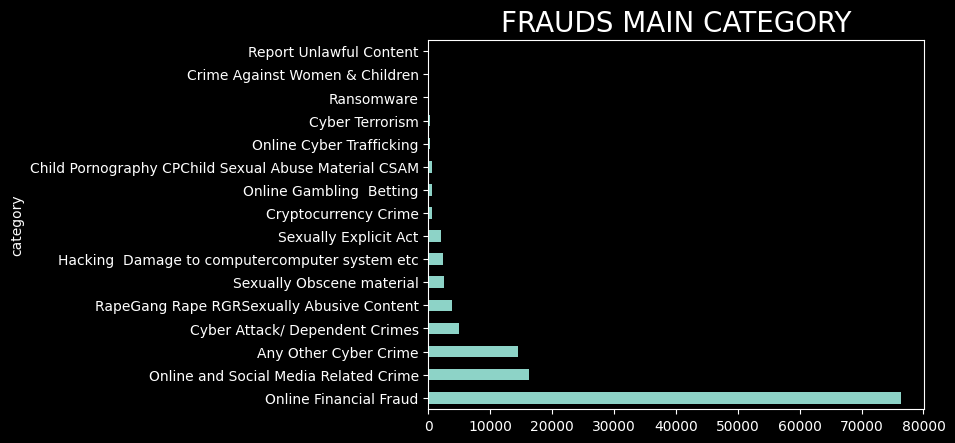

In [ ]:
#unique categories
data['category'].value_counts().plot(kind='barh')
plt.title('FRAUDS MAIN CATEGORY', fontsize=20)
plt.show()

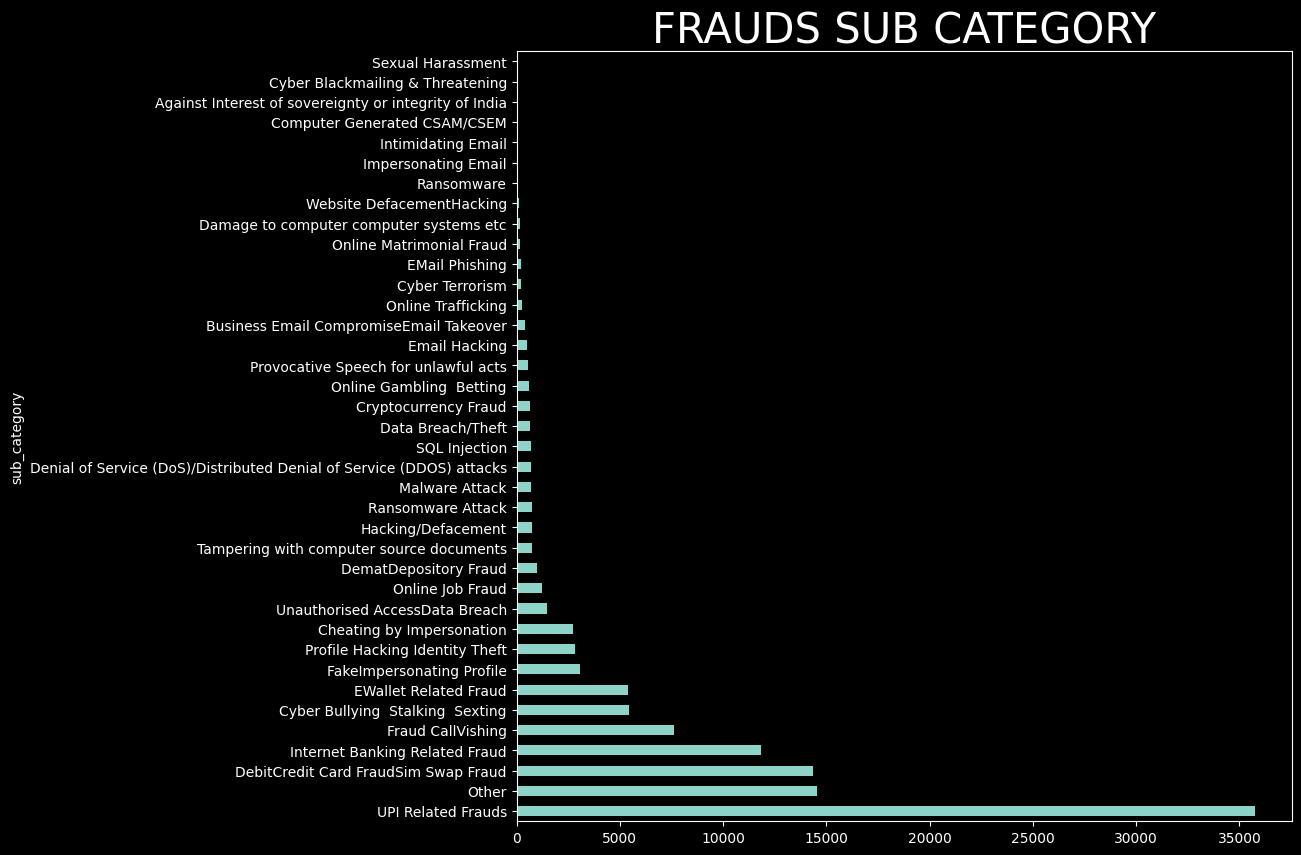

In [ ]:
#unique sub categories
plt.figure(figsize=(10,10))
data['sub_category'].value_counts().plot(kind='barh')
plt.title('FRAUDS SUB CATEGORY', fontsize=30)
plt.show()

In [ ]:
#
percentage = lambda x: round(x/data.shape[0], 2)
g = data.groupby('category')['category'].agg('count')
g = g.map(percentage).sort_values(ascending=False)
g

,category
category,
Online Financial Fraud,0.61
Online and Social Media Related Crime,0.13
Any Other Cyber Crime,0.12
Cyber Attack/ Dependent Crimes,0.04
RapeGang Rape RGRSexually Abusive Content,0.03
Hacking Damage to computercomputer system etc,0.02
Sexually Explicit Act,0.02
Sexually Obscene material,0.02
Cryptocurrency Crime,0.01


In [ ]:
g = data.groupby(by = ['category', 'sub_category'])['sub_category'].agg('count')
display(g)

category                                        sub_category                                                        
Any Other Cyber Crime                           Other                                                                   14548
Crime Against Women & Children                  Computer Generated CSAM/CSEM                                                2
                                                Cyber Blackmailing & Threatening                                            1
                                                Sexual Harassment                                                           1
Cryptocurrency Crime                            Cryptocurrency Fraud                                                      646
Cyber Attack/ Dependent Crimes                  Data Breach/Theft                                                         655
                                                Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks      691
                                                Hacking/Defacement                                                        740
                                                Malware Attack                                                            691
                                                Ransomware Attack                                                         720
                                                SQL Injection                                                             675
                                                Tampering with computer source documents                                  697
Cyber Terrorism                                 Cyber Terrorism                                                           213
Hacking  Damage to computercomputer system etc  Damage to computer computer systems etc                                   147
                                                Email Hacking                                                             479
                                                Tampering with computer source documents                                   64
                                                Unauthorised AccessData Breach                                           1484
                                                Website DefacementHacking                                                 128
Online Cyber Trafficking                        Online Trafficking                                                        244
Online Financial Fraud                          Business Email CompromiseEmail Takeover                                   380
                                                DebitCredit Card FraudSim Swap Fraud                                    14361
                                                DematDepository Fraud                                                     983
                                                EWallet Related Fraud                                                    5385
                                                Fraud CallVishing                                                        7630
                                                Internet Banking Related Fraud                                          11845
                                                UPI Related Frauds                                                      35746
Online Gambling  Betting                        Online Gambling  Betting                                                  578
Online and Social Media Related Crime           Cheating by Impersonation                                                2707
                                                Cyber Bullying  Stalking  Sexting                                        5455
                                                EMail Phishing                                                            211
                                                FakeImpersonating Profile                              

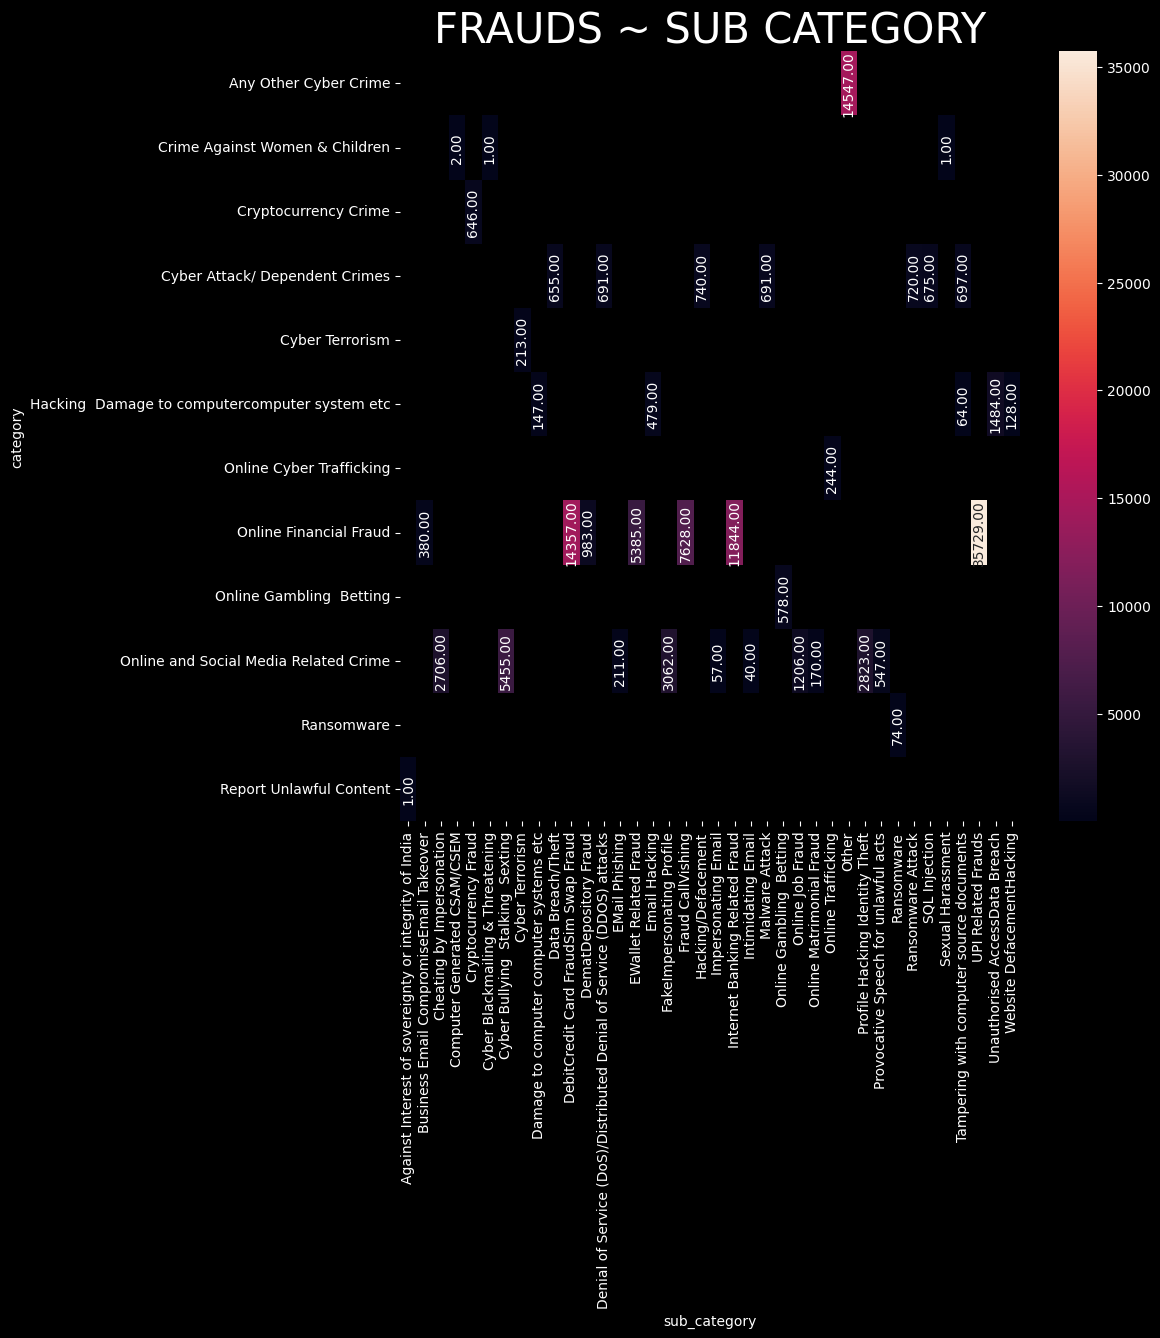

In [ ]:
#frauds per sub category using heatmap
plt.figure(figsize=(10,10))
pivot = data.pivot_table(index='category', columns='sub_category',
                       values='crimeaditionalinfo', aggfunc='count')
sns.heatmap(pivot, cmap='rocket', annot=True, fmt='.2f', annot_kws={'rotation': 90})
plt.title('FRAUDS ~ SUB CATEGORY', fontsize=30)
plt.show()

## Interpetations:
1. Online Frauds account for 61% of all Frauds.
  1. 26800+ Online Frauds are UPI related.
  1. while 10800+ are Debit Card Frauds.
3. While another popular category is Social Media Related Crime.

## Data Discovery
1. Word Count, Sentence Count, Word Cloud
2. Text Diversity - Discovery what languages are there?
3. NER - Organization, People, locations
4. Topic Modeling LDA

In [11]:
from pprint import pprint
import re

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Basic Stats - Word Count, Sentence Count, Word Cloud

In [12]:
print(data.shape)
print(type(data))

(124915, 3)
<class 'pandas.core.frame.DataFrame'>


In [13]:
data.isnull().sum()

,0
category,0
sub_category,8827
crimeaditionalinfo,28


In [14]:
#drop null values
data.dropna(inplace=True)
data.shape

(116061, 3)

In [15]:
def clean_text(text):
  text = text.strip() #leading and tail spaces remove
  text = re.sub(r'[\t\n\r]', ' ', text) #tab, newline, Carriage remove
  text = re.sub(r'\s+', ' ', text) #more than one spaces remove
  return text

sample = data.iloc[530, 2]
print("ORIGINAL")
pprint(sample)

sample = clean_text(sample)
print("CLEAN TEXT")
pprint(sample)

ORIGINAL
('NameNiraj singh \r\n'
 'AddGangapur city \r\n'
 'Dist Sawaimadhopur\r\n'
 'Pssadar\r\n'
 'Pin code\r\n'
 'G Mail idnahi hai  \r\n'
 'Suchna karta ka  no \r\n'
 '\r\n'
 'Fraud byPhone pay np\r\n'
 '\r\n'
 'BankBOB AC no IFSCnahi hai  BranchUdai mode\r\n'
 '\r\n'
 'Total Amount\r\n'
 '\r\n'
 'TR IDT Timepm Date Amount \r\n'
 '    UTR ID\r\n'
 '\r\n'
 'Frauder Details nahi hai \r\n'
 '\r\n'
 'Summarysuchna karta ne bataya ki facebook par ek sckrez Code aaya or Sckrez '
 'karne par pese cut liye gye \r\n'
 '\r\n'
 '\r\n'
 '\r\n'
 '\r\n')
CLEAN TEXT
('NameNiraj singh AddGangapur city Dist Sawaimadhopur Pssadar Pin code G Mail '
 'idnahi hai Suchna karta ka no Fraud byPhone pay np BankBOB AC no IFSCnahi '
 'hai BranchUdai mode Total Amount TR IDT Timepm Date Amount UTR ID Frauder '
 'Details nahi hai Summarysuchna karta ne bataya ki facebook par ek sckrez '
 'Code aaya or Sckrez karne par pese cut liye gye')


In [16]:
pprint(f'Split by space: {len(sample.split(" "))}')
pprint(f'Split by nltk word: {len(word_tokenize(sample))}')
pprint(f'Split by nltk sent: {len(sent_tokenize(sample))}')

'Split by space: 60'
'Split by nltk word: 60'
'Split by nltk sent: 1'


In [17]:
#clean text
data['clean_text'] = data['crimeaditionalinfo'].map(clean_text)

#word count
data['word_count'] = data['crimeaditionalinfo'].map(lambda x: len(word_tokenize(x)))

#sentence count
data['sentence_count'] = data['crimeaditionalinfo'].map(lambda x: len(sent_tokenize(x)))

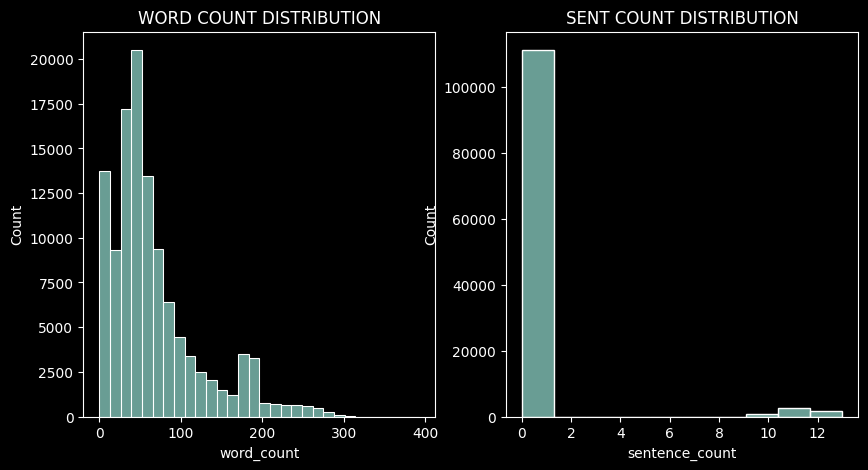

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=data, x='word_count', bins=30, ax=ax[0])
ax[0].set_title('WORD COUNT DISTRIBUTION')

sns.histplot(data=data, x='sentence_count', bins=10, ax=ax[1])
ax[1].set_title('SENT COUNT DISTRIBUTION')
plt.show()

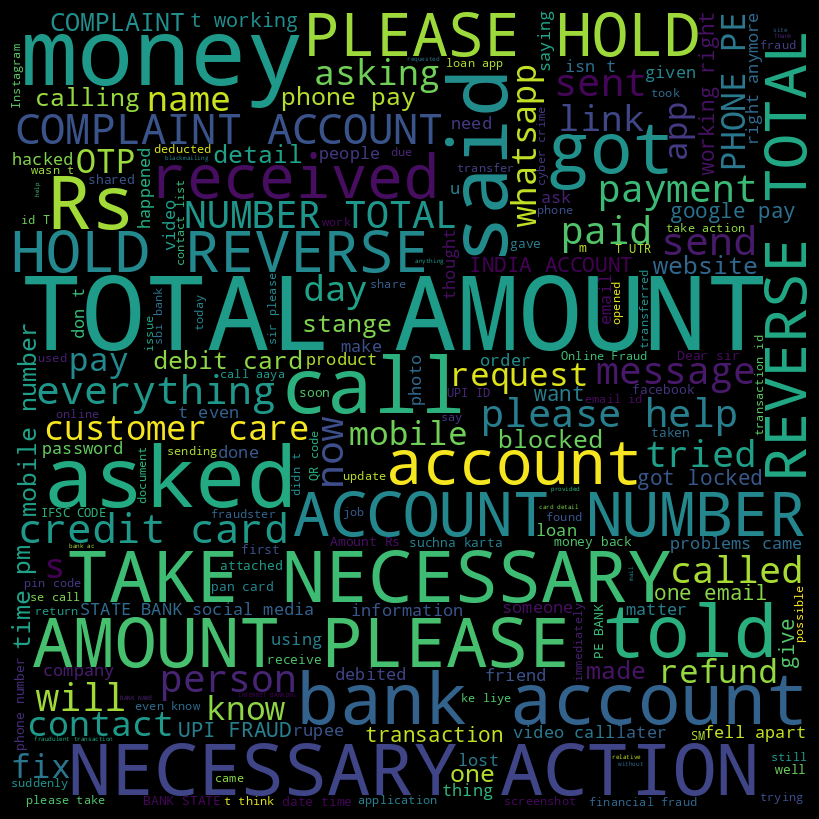

In [18]:
#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['clean_text'].tolist())
wordcloud = WordCloud(width=800, height=800).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### WordCloud by Category

In [ ]:
g = data.groupby(by = ['category'])['clean_text'].apply(lambda x: ' '.join(x))

,clean_text
category,
Any Other Cyber Crime,Details entered in pdf file Person posing as A...
Crime Against Women & Children,My friend mentioned something like this happen...
Cryptocurrency Crime,Sir I have invested around lakh in these app f...
Cyber Attack/ Dependent Crimes,The issue actually started when I got this ema...
Cyber Terrorism,Mene online application se loan liyha hai meri...
Hacking Damage to computercomputer system etc,I need my account back it is very important fo...
Online Cyber Trafficking,SIR I HAVE GET SMS WITH PRE APPORVED LOAN IJUS...
Online Financial Fraud,The above fraudster is continuously messaging ...
Online Gambling Betting,He is acting like a police and demanding for m...


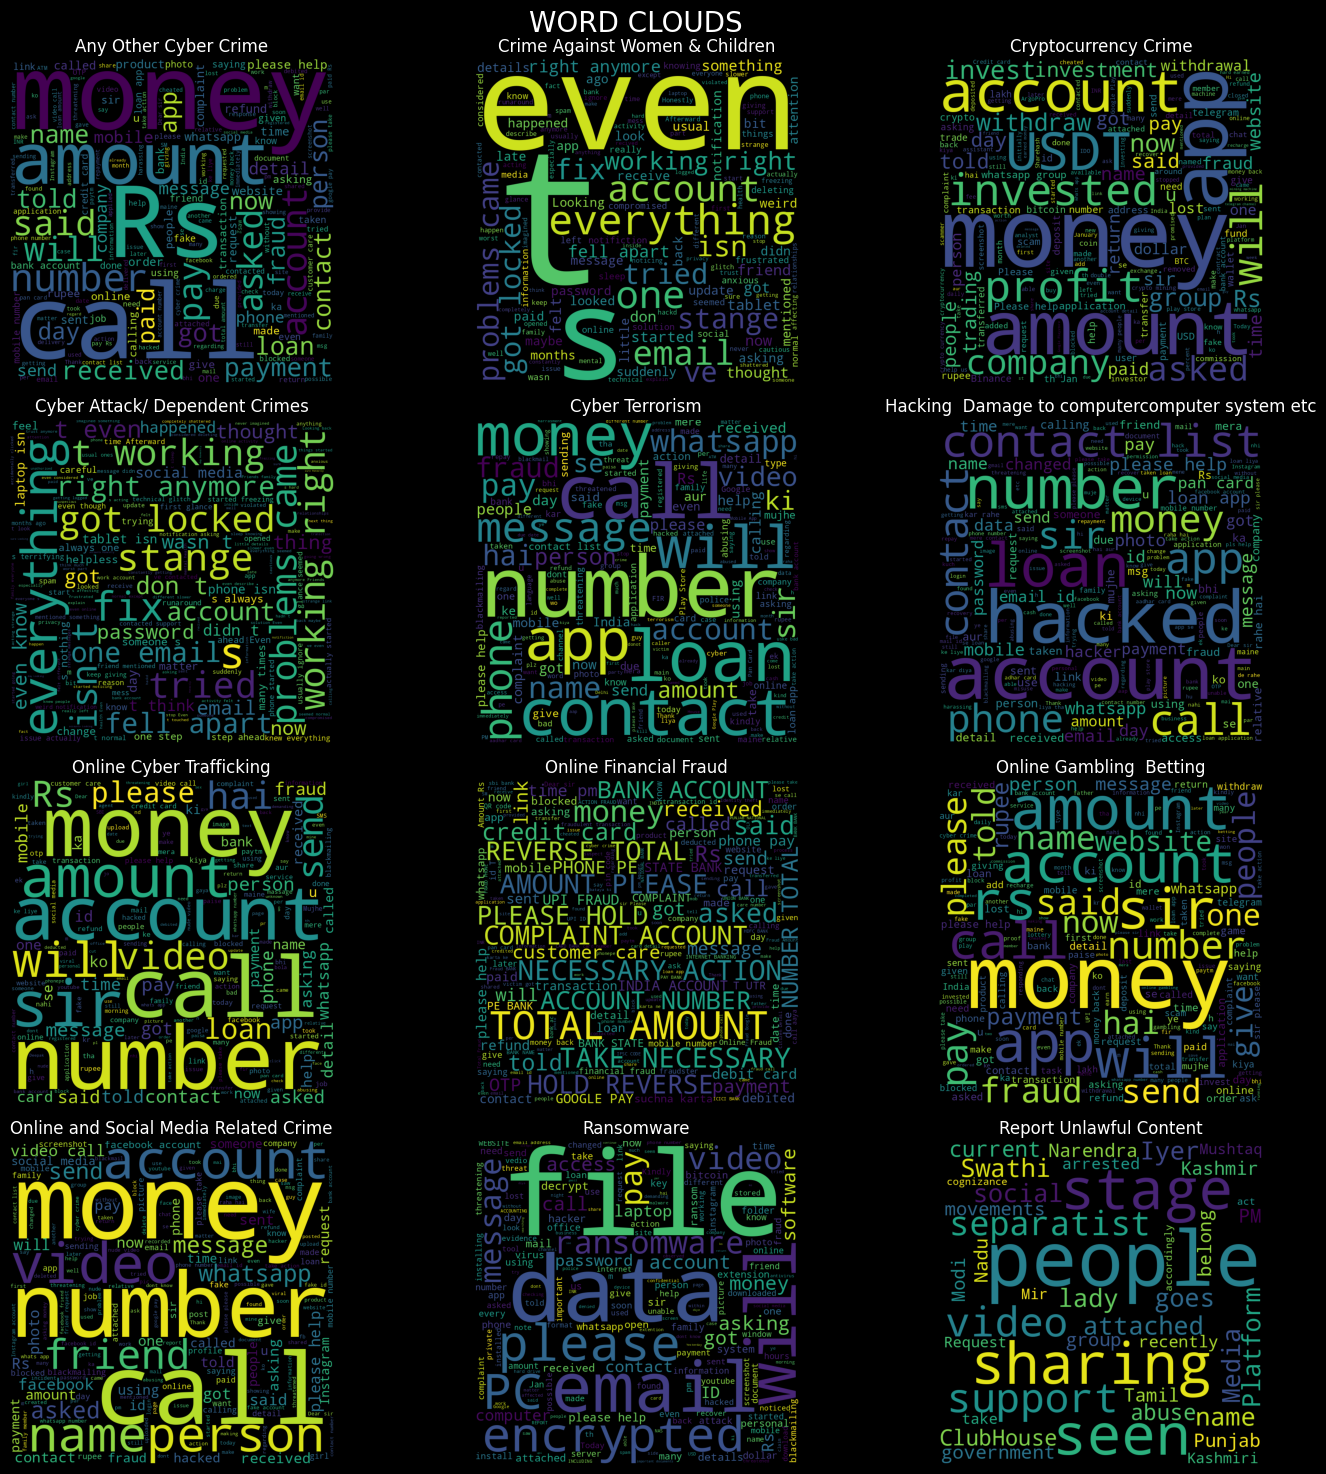

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('WORD CLOUDS', fontsize=20)
ax = ax.flatten()

for i, (category, text) in enumerate(g.items()):
  wordcloud = WordCloud(width=800, height=800).generate(text)
  ax[i].imshow(wordcloud)
  ax[i].axis('off')
  ax[i].set_title(category)

plt.tight_layout()
plt.show()

In [29]:
#sample
sample = data.iloc[530, 3]
print("ORIGINAL")
pprint(sample)

#preprocess
print("PREPROCESS")
pprint(' '.join(wordcloud.process_text(sample).keys()))

ORIGINAL
('NameNiraj singh AddGangapur city Dist Sawaimadhopur Pssadar Pin code G Mail '
 'idnahi hai Suchna karta ka no Fraud byPhone pay np BankBOB AC no IFSCnahi '
 'hai BranchUdai mode Total Amount TR IDT Timepm Date Amount UTR ID Frauder '
 'Details nahi hai Summarysuchna karta ne bataya ki facebook par ek sckrez '
 'Code aaya or Sckrez karne par pese cut liye gye')
PREPROCESS
('NameNiraj singh AddGangapur city Dist Sawaimadhopur Pssadar Pin code G Mail '
 'idnahi hai Suchna karta ka Fraud byPhone pay np BankBOB AC IFSCnahi '
 'BranchUdai mode Total Amount TR IDT Timepm Date UTR ID Frauder Details nahi '
 'Summarysuchna ne bataya ki facebook par ek sckrez aaya karne pese cut liye '
 'gye')


In [18]:
def preprocess_wordcloud(text):
  return ' '.join(wordcloud.process_text(text).keys())

data['preprocess_wordcloud'] = data['clean_text'].map(preprocess_wordcloud)

## PHASE 2: DATA PIPELINE AND MODEL BUILDING EDA
1. Explore various Text Preprocessing Approaches
2. Explore various ML, DL and Transformer Models

## TF-IDF


In [34]:
#sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
#defining evaluation
def evaluation(y_test, y_pred):
  print("ACCURACY: ", accuracy_score(y_test, y_pred))
  print("CLASSIFICATION REPORT: \n", classification_report(y_test, y_pred))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
  plt.show()

In [21]:
#data preparation and split
X = data['crimeaditionalinfo']
y = data['category']

print("ORIGINAL")
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("TRAIN TEST SPLIT")
print(X_train.shape, X_test.shape)

ORIGINAL
(116061,) (116061,)
TRAIN TEST SPLIT
(92848,) (23213,)


In [22]:
%%time
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)

def clean_text(X: pd.DataFrame) -> pd.DataFrame:
  '''clean text strip -> \n\t\r -> whitespaces'''
  return X.apply(lambda text: re.sub(r'\s+', ' ', re.sub(r'[\t\n\r]', ' ', text.strip())))

def preprocess_wordcloud(X: pd.DataFrame) -> pd.DataFrame:
  '''wordcloud process -> stopwords, common words'''
  return X.apply(lambda text: ' '.join(WordCloud().process_text(text).keys()))

#preprocessing steps
preprocessor = Pipeline(steps=[
    ('clean_text', FunctionTransformer(clean_text, validate=False)), #clean text
    ('word_cloud', FunctionTransformer(preprocess_wordcloud, validate=False)),
    ('tfidf', tfidf)
])

(92848, 100000)
CPU times: user 1min 48s, sys: 784 ms, total: 1min 48s
Wall time: 2min 19s


### MultiNomial NB: 74%

ACCURACY:  0.737043897815879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CLASSIFICATION REPORT: 
                                                 precision    recall  f1-score   support

                         Any Other Cyber Crime       0.81      0.01      0.02      2916
                Crime Against Women & Children       0.00      0.00      0.00         1
                          Cryptocurrency Crime       0.00      0.00      0.00       110
                Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       942
                               Cyber Terrorism       0.00      0.00      0.00        40
Hacking  Damage to computercomputer system etc       0.00      0.00      0.00       452
                      Online Cyber Trafficking       0.00      0.00      0.00        48
                        Online Financial Fraud       0.72      1.00      0.84     15348
                      Online Gambling  Betting       0.00      0.00      0.00       108
         Online and Social Media Related Crime       0.82      0.26      0.39      3234
      

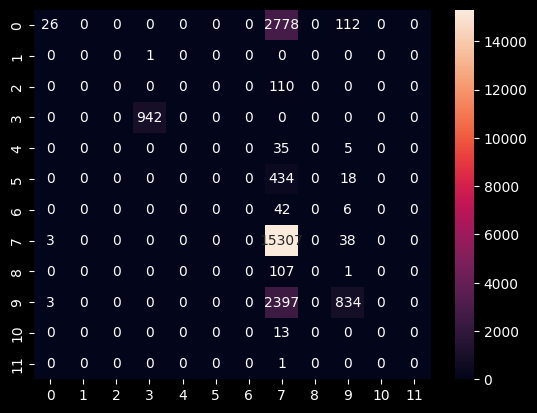

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
evaluation(y_test, y_pred)

### Random Forest: 74%

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100, random_state=42))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
evaluation(y_test, y_pred)

### Try: running SVC on GPU environment thru cuML : 80%
## cuML 😀
`cuML is library to accelerates machine learning on GPUs`
1. it integrates well with sklearn APIs
2. has it's own numpy - cupy and df - cudf
3. String's operations in cupy is not yet implemented so operations on text data is still not there yet.
4. many similar ML techniques from sklearn.

In [5]:
!pip install cuml-cu12

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (

In [ ]:
#cuml
import cupy as cp #cuda numpy
import cudf #cuda dataframe
from cupyx.scipy.sparse import csr_matrix as cp_csr_matrix
from cuml.preprocessing import LabelEncoder as cumlLabelEncoder
from cuml.feature_extraction.text import TfidfVectorizer as cumlTfidfVectorizer
from cuml.ensemble import RandomForestClassifier as cumlRandomForestClassifier
from cuml.pipeline import Pipeline as cumlPipeline
from cuml.preprocessing import FunctionTransformer as cumlFunctionTransformer
from cuml.svm import SVC as cumlSVC

In [ ]:
#check gpu available
cp.cuda.is_available()

In [ ]:
# cuML does not effectively support text based tfidf
#fit and transform
preprocessor.fit(X_train)
tfidf_train_X = preprocessor.transform(X_train)
print(tfidf_train_X.shape)

tfidf_X_test = preprocessor.transform(X_test)
print(tfidf_X_test.shape)

In [80]:
#neccessary convert pandas to cudf
cudf_X_train, cudf_X_test = cp_csr_matrix(tfidf_train_X), cp_csr_matrix(tfidf_X_test)
cudf_y_train, cudf_y_test = cudf.Series(y_train), cudf.Series(y_test)

encoder = cumlLabelEncoder()
cudf_y_train = encoder.fit_transform(cudf_y_train).astype('int32')
cudf_y_test = encoder.fit_transform(cudf_y_test).astype('int32')

In [ ]:
%%time
cuml_svc = cumlSVC()
cuml_svc.fit(cudf_X_train, cudf_y_train)

In [ ]:
cudf_y_pred = cuml_svc.predict(cudf_X_test)
#convert back to np
cudf_y_pred = encoder.inverse_transform(cudf_y_pred).to_pandas()
evaluation(y_test, cudf_y_pred)

### BERT pretrained

In [ ]:
#Text
crime_logs = data[['crimeaditionalinfo', 'category']]
crime_logs.head()

,crimeaditionalinfo,category
0,I had continue received random calls and abusi...,Online and Social Media Related Crime
1,The above fraudster is continuously messaging ...,Online Financial Fraud
2,He is acting like a police and demanding for m...,Online Gambling Betting
3,In apna Job I have applied for job interview f...,Online and Social Media Related Crime
4,I received a call from lady stating that she w...,Online Financial Fraud


In [ ]:
crime_logs.dropna(inplace=True)
crime_logs.shape

<ipython-input-12-d842a614d660>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_logs.dropna(inplace=True)


(124887, 2)

In [ ]:
X = crime_logs['crimeaditionalinfo']
y = crime_logs['category']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(X.shape, y.shape)
print(encoder.classes_)

(124887,) (124887,)
['Any Other Cyber Crime'
 'Child Pornography CPChild Sexual Abuse Material CSAM'
 'Crime Against Women & Children' 'Cryptocurrency Crime'
 'Cyber Attack/ Dependent Crimes' 'Cyber Terrorism'
 'Hacking  Damage to computercomputer system etc'
 'Online Cyber Trafficking' 'Online Financial Fraud'
 'Online Gambling  Betting' 'Online and Social Media Related Crime'
 'Ransomware' 'RapeGang Rape RGRSexually Abusive Content'
 'Report Unlawful Content' 'Sexually Explicit Act'
 'Sexually Obscene material']


<ipython-input-10-29388eab5baa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_logs.dropna(inplace=True)


## Training BERT pre-trained model

<ipython-input-14-0ab63294b895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_data['category'] = off_data['category'].map(lambda x: 1 if x=='Online Financial Fraud' else 0)


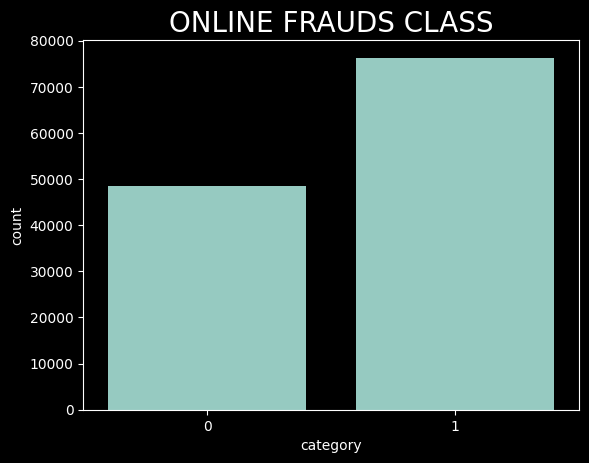

In [ ]:
#
off_data = crime_logs[['crimeaditionalinfo', 'category']]
off_data['category'] = off_data['category'].map(lambda x: 1 if x=='Online Financial Fraud' else 0)
sns.countplot(x='category', data=off_data)
plt.title('ONLINE FRAUDS CLASS', fontsize=20)
plt.show()

In [ ]:
import re
def text_preprocessing(text):
  text = text.strip()
  text = re.sub(r'[\t\n\r\s+]', ' ', text)
  text = re.sub('<[^<]+?>', '', text)
  return text

off_data['crimeaditionalinfo'] = off_data['crimeaditionalinfo'].map(text_preprocessing)
off_data.head()

<ipython-input-15-ae8a693df980>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_data['crimeaditionalinfo'] = off_data['crimeaditionalinfo'].map(text_preprocessing)


,crimeaditionalinfo,category
0,I had continue received random calls and abusi...,0
1,The above fraudster is continuously messaging ...,1
2,He is acting like a police and demanding for m...,0
3,In apna Job I have applied for job interview f...,0
4,I received a call from lady stating that she w...,1


In [ ]:
#prepare text tokenizer
text = off_data['crimeaditionalinfo'].tolist()
labels = off_data['category'].tolist()
type(text)

list

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def tokenizer_text(text):
  return tokenizer(text, return_tensors='pt',
                   truncation=True, padding='max_length',
                   max_length=256)

tokenized_text = list(map(tokenizer_text, text))
type(tokenized_text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

list

In [ ]:
tokenized_text[3].get('input_ids').shape

torch.Size([1, 256])

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    input_ids = self.encodings[idx]['input_ids'].flatten()
    attention_mask = self.encodings[idx]['attention_mask'].flatten()
    token_type_ids = self.encodings[idx]['token_type_ids'].flatten()
    label = self.labels[idx]
    return {'input_ids': input_ids,
            'token_type_ids': token_type_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long)}

encodings = tokenized_text
dataset = CustomDataset(encodings, labels)

In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
print(train_size, val_size)

99909 24978


In [ ]:
# Custom collate function for padding
from torch.nn.utils.rnn import pad_sequence
def custom_collate_fn(batch):
  """
  This function pads the sequences in a batch to the same length.
  """
  # Get the maximum sequence length in the batch
  max_len = max(len(sample['input_ids']) for sample in batch)

  # Pad the sequences
  input_ids = pad_sequence([sample['input_ids'] for sample in batch], batch_first=True, padding_value=0)  # Assuming 0 is your padding token ID
  attention_mask = pad_sequence([sample['attention_mask'] for sample in batch], batch_first=True, padding_value=0)
  token_type_ids = pad_sequence([sample['token_type_ids'] for sample in batch], batch_first=True, padding_value=0)
  labels = torch.stack([sample['labels'] for sample in batch])

  # Return the padded batch
  return {'input_ids': input_ids,
          'token_type_ids': token_type_ids,
          'attention_mask': attention_mask,
          'labels': labels}

In [ ]:
#DataLoaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=custom_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=custom_collate_fn)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
#define BertModel
from transformers import BertForSequenceClassification
num_labels = off_data['category'].nunique()
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels=num_labels,
                                                      torch_dtype=torch.float16)
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
for batch in train_loader:
  print(batch)
  break

{'input_ids': tensor([[ 101, 2561, 2039,  ...,    0,    0,    0],
        [ 101, 9861, 2083,  ...,    0,    0,    0],
        [ 101, 1996, 3277,  ...,    0,    0,    0],
        ...,
        [ 101, 9861, 2083,  ...,    0,    0,    0],
        [ 101, 2023, 2035,  ...,    0,    0,    0],
        [ 101, 2009, 2003,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])}


In [ ]:
from torch.optim import AdamW
import torch

optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 5

In [ ]:
%%time
train_loss = []
val_loss = []

for epoch in range(num_epochs):
  train_loss_epoch = []
  val_loss_epoch = []
  #Training
  model.train()
  for batch in train_loader:
      optimizer.zero_grad()
      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['labels'].to(device)
      outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
      loss = outputs.loss
      train_loss_epoch.append(loss.item())
      loss.backward()
      optimizer.step()
  train_loss.append(np.mean(train_loss_epoch))

  #Evaluation
  model.eval()
  with torch.no_grad():
    for batch in val_loader:
      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['labels'].to(device)
      outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
      val_loss = outputs.loss
      val_loss_epoch.append(val_loss.item())
    val_loss.append(np.mean(val_loss_epoch))
    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss_epoch[-1]} Val Loss: {val_loss_epoch[-1]}')

In [ ]:
#save model
model.save_pretrained('model.pth')